In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay
)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/telco_churn.csv")

In [3]:
df = df.drop(columns=["State"])

In [4]:
df["Churn"] = (
    df["Churn"]
    .astype(str)
    .str.upper()
    .map({"FALSE": 0, "TRUE": 1, "0": 0, "1": 1})
)


In [5]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
binary_cols = ["International plan", "Voice mail plan"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [7]:
df["Churn"].value_counts()
df.isnull().sum()["Churn"]

np.int64(0)

In [8]:
df = pd.get_dummies(df, columns=["Area code"], drop_first=True)

In [9]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



---

# **Logistic Regression — Baseline**


---



In [11]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [12]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

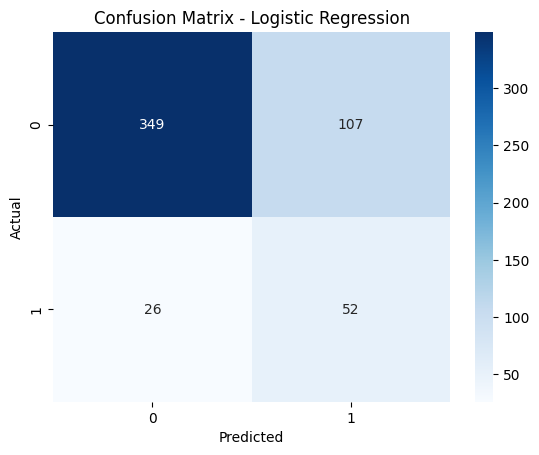

In [13]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       456
           1       0.33      0.67      0.44        78

    accuracy                           0.75       534
   macro avg       0.63      0.72      0.64       534
weighted avg       0.84      0.75      0.78       534



In [15]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

np.float64(0.7575067476383266)

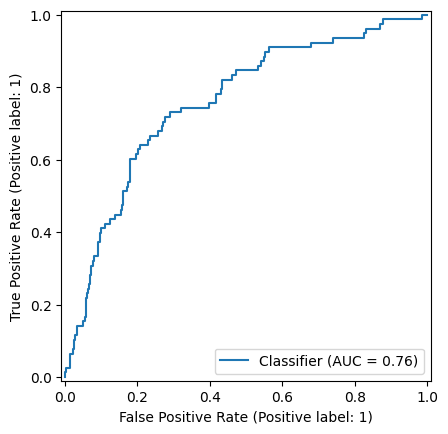

In [16]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()



---

# **Logistic Regression — Threshold Tuning**


---



In [17]:
threshold = 0.3
y_pred_thresh = (y_pred_proba >= threshold).astype(int)


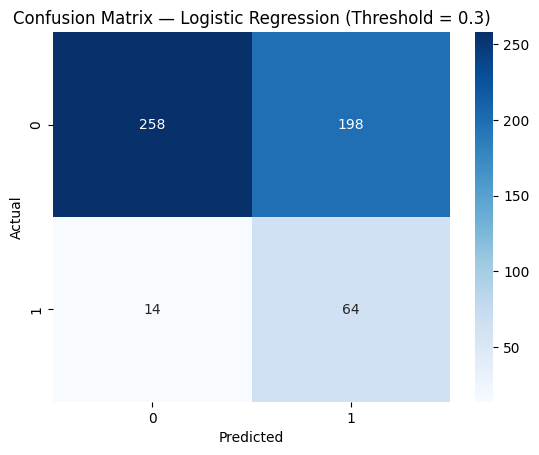

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

cm_thresh = confusion_matrix(y_test, y_pred_thresh)

sns.heatmap(cm_thresh, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression (Threshold = 0.3)")
plt.show()

In [19]:
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.95      0.57      0.71       456
           1       0.24      0.82      0.38        78

    accuracy                           0.60       534
   macro avg       0.60      0.69      0.54       534
weighted avg       0.85      0.60      0.66       534





---

# **Random Forest — Baseline**


---



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [22]:
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

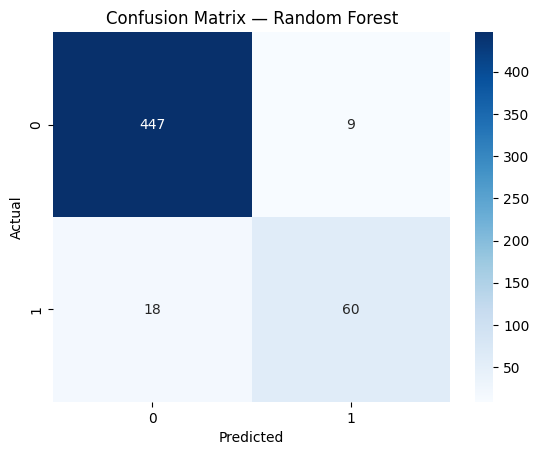

In [23]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest")
plt.show()

In [24]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.87      0.77      0.82        78

    accuracy                           0.95       534
   macro avg       0.92      0.87      0.89       534
weighted avg       0.95      0.95      0.95       534



In [25]:
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_rf

np.float64(0.8793578497525866)

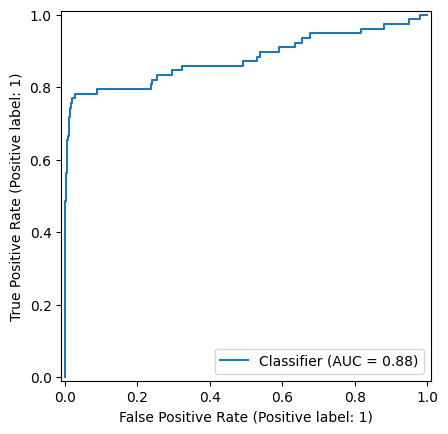

In [26]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba_rf)
plt.show()



---

# **Threshold Tuning for Random Forest(threshold = 0.35)**


---



In [27]:
threshold = 0.35
y_pred_rf_thresh = (y_pred_proba_rf >= threshold).astype(int)

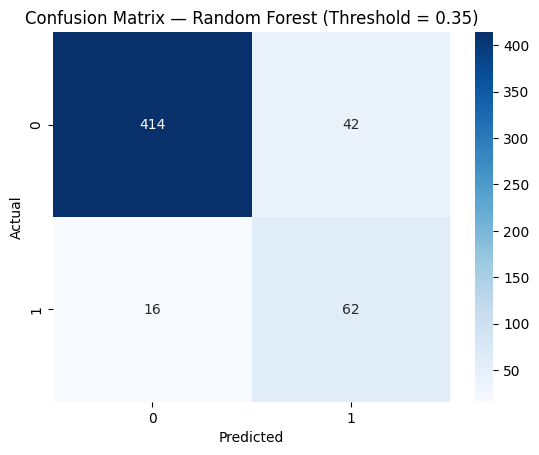

In [28]:
cm_rf_thresh = confusion_matrix(y_test, y_pred_rf_thresh)

sns.heatmap(cm_rf_thresh, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest (Threshold = 0.35)")
plt.show()

In [29]:
print(classification_report(y_test, y_pred_rf_thresh))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       456
           1       0.60      0.79      0.68        78

    accuracy                           0.89       534
   macro avg       0.78      0.85      0.81       534
weighted avg       0.91      0.89      0.90       534



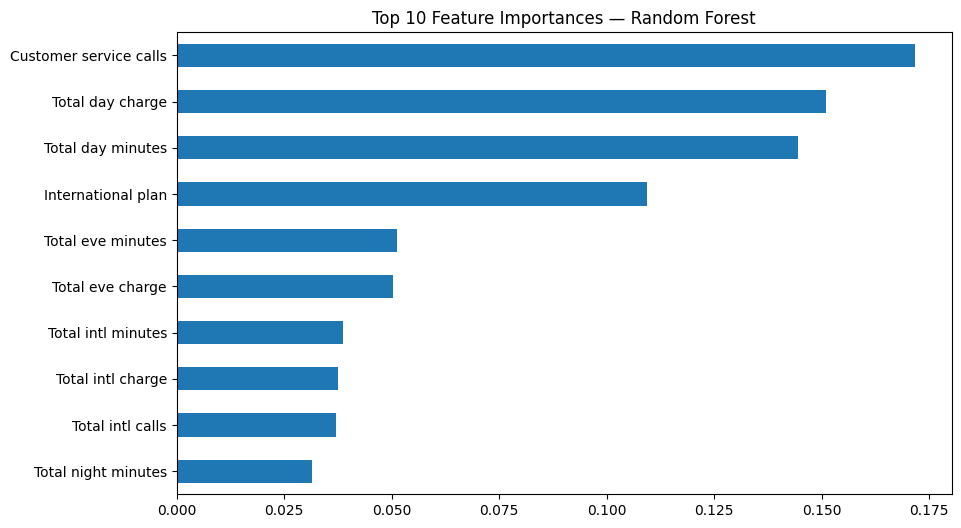

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances — Random Forest")
plt.gca().invert_yaxis()
plt.show()


## Final Business Insights

- Customers with frequent customer service calls are at the highest risk of churn.
- International plan usage and higher international charges strongly correlate with churn.
- High daytime usage customers are more sensitive to service quality and pricing.
- A Random Forest model with a tuned threshold effectively balances churn detection and retention cost.
